In [1]:
from google.cloud import bigquery
import operator
import networkx as nx
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
client = bigquery.Client.from_service_account_json(
        'My_Project-c23185ac100b.json')
client.project

'hardy-moon-199316'

In [3]:
query_word = "operating-system"

In [1]:
# query = """
#         SELECT tags
#         FROM `bigquery-public-data.stackoverflow.posts_questions`
#         """
# query_job = client.query(query)
# results = query_job.result()

# bigrams = []
# gram = 2
# for row in results:
#     token = row.tags.split('|')
#     bigram = list(ngrams(token,gram))
#     bigrams.extend(bigram)
# fdist=FreqDist(bigrams)
# print(fdist.most_common(30))

        

In [ ]:
#fdist.most_common(100)


In [ ]:
# correlation = []
# for word in associated_words:
#     query = """
#         SELECT tags
#         FROM `bigquery-public-data.stackoverflow.posts_questions`
#         where  tags like @a
#         limit 100000
#         """
#     query_params = [
#         bigquery.ScalarQueryParameter(
#             'a', 'STRING', "%"+word+"%")
#         ]
#     job_config = bigquery.QueryJobConfig()
#     job_config.query_parameters = query_params
#     query_job = client.query(query, job_config=job_config)
#     results = query_job.result()
#     bigrams = []
#     gram = 2
#     for row in results:
#         token = row.tags.split('|')
#         bigram = list(ngrams(token,gram))
#         bigrams.extend(bigram)
#     fdist=FreqDist(bigrams)
#     strong_words_temp = []
    
#     for comb in fdist.most_common(20):
#         if word in comb[0]:
#             strong_words_temp.append(comb[0][comb[0].index(word) - 1]) 
#             if comb[0][comb[0].index(word) - 1]  == query_word or (word != comb[0][comb[0].index(word) - 1]) and comb[0][comb[0].index(word) - 1] in associated_words:
#                 correlation.append(word)
#     print(word, strong_words_temp)
# print(correlation)

In [ ]:
# set(correlation)

In [ ]:
# # take these strong words and then use the with initial word and use them together to find one bigger ngram.
# most_frequent_3_comb = {}
# for word in set(correlation):
#     query = """
#         SELECT tags
#         FROM `bigquery-public-data.stackoverflow.posts_questions`
#         where  tags like @a and tags like @b
#         limit 1000000
#         """
#     query_params = [
#         bigquery.ScalarQueryParameter(
#             'a', 'STRING', "%"+word+"%"),
#         bigquery.ScalarQueryParameter(
#             'b', 'STRING', "%"+query_word+"%")
#         ]
#     job_config = bigquery.QueryJobConfig()
#     job_config.query_parameters = query_params
#     query_job = client.query(query, job_config=job_config)
#     results = query_job.result()
#     bigrams = []
#     gram = 3
#     for row in results:
#         token = row.tags.split('|')
#         bigram = list(ngrams(token,gram))
#         bigrams.extend(bigram)
#     fdist=FreqDist(bigrams)
    
#     for l in fdist.most_common(5):
#         for w in l[0]:
#             if w not in set(correlation):
#                 break
#             if w in most_frequent_3_comb:
#                 most_frequent_3_comb[w] += 1
#             else:
#                 most_frequent_3_comb[w] = 1
# print(most_frequent_3_comb)
    

In [ ]:
# most_frequent_comb = sorted(most_frequent_3_comb.items(), key=operator.itemgetter(1), reverse=True)[0][0]

In [ ]:
# most_frequent_3_comb

In [ ]:
# i can obviosuly go directly but then that would not be the right way to navigate to that tag. I have to find what is the
# right link to get to that word that actually makes sense. for example data structure, tree, binary-search-tree would be 
# right link rather than data structure, java, binary-search-tree

# I can get to binary search tree faster thru tree than going thru graph. 

In [ ]:
# query = """
#     SELECT tags
#     FROM `bigquery-public-data.stackoverflow.posts_questions`
#     where  tags like @a and tags like @b
#     limit 1000000
#     """
# query_params = [
#     bigquery.ScalarQueryParameter(
#         'a', 'STRING', "%"+most_frequent_comb+"%"),
#     bigquery.ScalarQueryParameter(
#         'b', 'STRING', "%"+query_word+"%")
#     ]
# job_config = bigquery.QueryJobConfig()
# job_config.query_parameters = query_params
# query_job = client.query(query, job_config=job_config)
# results = query_job.result()
# bigrams = []
# gram = 3
# for row in results:
#     token = row.tags.split('|')
#     bigram = list(ngrams(token,gram))
#     bigrams.extend(bigram)
# fdist=FreqDist(bigrams)

In [ ]:
# fdist.most_common(10)
# what if all of them have the same score and some of them contains both the words then which word do you choose? 

In [ ]:
# other_comb_word = [x for x in fdist.most_common(5)[0][0] if x not in [most_frequent_comb, query_word]][0]
# other_comb_word

In [ ]:
# query = """
#     SELECT tags
#     FROM `bigquery-public-data.stackoverflow.posts_questions`
#     where  tags like @a and tags like @b and tags like @c
#     """
# query_params = [
#     bigquery.ScalarQueryParameter(
#         'a', 'STRING', "%"+other_comb_word+"%"),
#     bigquery.ScalarQueryParameter(
#         'b', 'STRING', "%"+most_frequent_comb+"%"),
#     bigquery.ScalarQueryParameter(
#         'c', 'STRING', "%"+query_word+"%")
#     ]
# job_config = bigquery.QueryJobConfig()
# job_config.query_parameters = query_params
# query_job = client.query(query, job_config=job_config)
# results = query_job.result()
# bigrams = []
# gram = 4
# for row in results:
#     token = row.tags.split('|')
#     bigram = list(ngrams(token,gram))
#     bigrams.extend(bigram)
# fdist=FreqDist(bigrams)

In [ ]:
# fdist.most_common(5)

In [ ]:
# query = """
#     SELECT title, score
#     FROM `bigquery-public-data.stackoverflow.posts_questions`
#     where  tags like @a and tags like @b and tags like @c
#     order by score desc
#     """
# query_params = [
#     bigquery.ScalarQueryParameter(
#         'a', 'STRING', "%"+other_comb_word+"%"),
#     bigquery.ScalarQueryParameter(
#         'b', 'STRING', "%"+most_frequent_comb+"%"),
#     bigquery.ScalarQueryParameter(
#         'c', 'STRING', "%"+query_word+"%")
#     ]
# job_config = bigquery.QueryJobConfig()
# job_config.query_parameters = query_params
# query_job = client.query(query, job_config=job_config)

In [ ]:
# results = query_job.result()
# for row in results:
#     print(row.title, row.score)

In [ ]:
# query = """
#     SELECT tags, title
#     FROM `bigquery-public-data.stackoverflow.posts_questions`
#     where  tags like @a 
#     order by score desc
#     """
# query_params = [
#     bigquery.ScalarQueryParameter(
#         'a', 'STRING', "%"+query_word+"%")
#     ]
# job_config = bigquery.QueryJobConfig()
# job_config.query_parameters = query_params
# query_job = client.query(query, job_config=job_config)

In [ ]:
# results = query_job.result()
# for row in results:
#     print(row.tags, row.title)

In [ ]:
# there are many ways to miss the most important questions just because there was no tag associated with it. 
# This way I might miss many of the important questions on 2-3-4 trees. 

In [ ]:
# query = """
#     SELECT tag_name, count
#     FROM `bigquery-public-data.stackoverflow.tags`
#     where tag_name like "%data-structure%"
#     """
# nfig = bigquery.QueryJobConfig()
# job_config.query_parameters = query_params
# query_job = client.query(query, job_config=job_config)

In [ ]:
# results = query_job.result()


In [ ]:
# for row in results:
#     print(row.tag_name, row.count)

In [3]:
# query = """
#     SELECT tags
#     FROM `bigquery-public-data.stackoverflow.posts_questions`
#     limit 1000000
#     """
# nfig = bigquery.QueryJobConfig()
# query_job = client.query(query)

In [4]:
# import numpy as np
# import csv
# import os
# if not os.path.exists('data.csv'):
#     results = query_job.result()
#     with open('data.csv', 'w') as myfile:
#         wr = csv.writer(myfile)
#         for row in results:
#             wr.writerow(row.tags.split("|"))

In [2]:
import csv 
import sys #used for passing in the argument
file_name = "data.csv" #filename is argument 1
with open(file_name, 'rU') as f:  #opens PW file
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists


/Users/ankurkothari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [3]:
len(data)

15483377

In [4]:
from gensim.models import Word2Vec
import os

In [5]:
if not os.path.exists('word2vec_model'):
    word2vec_model = Word2Vec(data, min_count=1, size=200)
    word2vec_model.save("word2vec_model")
else:
    from gensim.models import KeyedVectors
    word2vec_model = KeyedVectors.load("word2vec_model")

In [6]:
words = word2vec_model.wv.vocab

In [8]:
word2vec_model.wv.most_similar(["computer-science"], topn=20)

[('theory', 0.7612944841384888),
 ('pseudocode', 0.7192685604095459),
 ('language-agnostic', 0.6468707323074341),
 ('complexity-theory', 0.6251490116119385),
 ('terminology', 0.6134716272354126),
 ('algorithm', 0.607740044593811),
 ('genetic-algorithm', 0.6058915853500366),
 ('programming-languages', 0.6020088791847229),
 ('time-complexity', 0.5887659788131714),
 ('big-o', 0.5870718359947205),
 ('artificial-intelligence', 0.5832962989807129),
 ('graph-theory', 0.5582891702651978),
 ('data-structures', 0.5484554767608643),
 ('graph-algorithm', 0.5419406890869141),
 ('fibonacci', 0.5305843353271484),
 ('combinatorics', 0.5254076719284058),
 ('depth-first-search', 0.5252924561500549),
 ('analysis', 0.5125199556350708),
 ('breadth-first-search', 0.5113461017608643),
 ('coq', 0.5080100297927856)]

In [12]:
word2vec_model.wv.most_similar(["computer-science", "data-structures"], topn=20)

[('theory', 0.7460376024246216),
 ('pseudocode', 0.7389877438545227),
 ('complexity-theory', 0.717954158782959),
 ('time-complexity', 0.7132235765457153),
 ('big-o', 0.6896770000457764),
 ('algorithm', 0.67397141456604),
 ('breadth-first-search', 0.6582311391830444),
 ('depth-first-search', 0.6502692699432373),
 ('binary-search', 0.6419482231140137),
 ('binary-tree', 0.6293895244598389),
 ('graph-theory', 0.6265237331390381),
 ('graph-algorithm', 0.6227940320968628),
 ('genetic-algorithm', 0.6218898892402649),
 ('combinatorics', 0.6081250905990601),
 ('language-agnostic', 0.6044280529022217),
 ('hashtable', 0.602498471736908),
 ('binary-search-tree', 0.5953637361526489),
 ('terminology', 0.5921038389205933),
 ('dynamic-programming', 0.5873878002166748),
 ('priority-queue', 0.5871609449386597)]

In [10]:
word2vec_model.wv.most_similar(["data-structures"], topn=20)

[('time-complexity', 0.6663678288459778),
 ('binary-search', 0.6632024049758911),
 ('hashtable', 0.6614689826965332),
 ('breadth-first-search', 0.6470118761062622),
 ('complexity-theory', 0.6383097171783447),
 ('big-o', 0.6266247630119324),
 ('depth-first-search', 0.6190541982650757),
 ('priority-queue', 0.6065918803215027),
 ('binary-tree', 0.6043097376823425),
 ('binary-search-tree', 0.6017762422561646),
 ('singly-linked-list', 0.5945053100585938),
 ('pseudocode', 0.5812052488327026),
 ('algorithm', 0.5783177614212036),
 ('dijkstra', 0.5661864280700684),
 ('linked-list', 0.5656846761703491),
 ('hashmap', 0.5650386810302734),
 ('mergesort', 0.554909884929657),
 ('graph-algorithm', 0.5540547370910645),
 ('theory', 0.5515857934951782),
 ('iterator', 0.5490413904190063)]

In [13]:
word2vec_model.wv.most_similar(["graph"], topn=20)

[('graph-theory', 0.6514880657196045),
 ('visualization', 0.6060482263565063),
 ('graph-algorithm', 0.5983623266220093),
 ('shortest-path', 0.5886834263801575),
 ('data-visualization', 0.5687622427940369),
 ('dijkstra', 0.558900773525238),
 ('scatter-plot', 0.5529917478561401),
 ('path-finding', 0.5373026132583618),
 ('pie-chart', 0.5354716777801514),
 ('breadth-first-search', 0.527571976184845),
 ('computational-geometry', 0.5223681926727295),
 ('diagram', 0.5150697231292725),
 ('networkx', 0.5144349336624146),
 ('bar-chart', 0.503139853477478),
 ('histogram', 0.49811655282974243),
 ('heatmap', 0.4969313442707062),
 ('linechart', 0.48807257413864136),
 ('igraph', 0.48561719059944153),
 ('depth-first-search', 0.4798464775085449),
 ('shapes', 0.47113150358200073)]

In [14]:
X = word2vec_model[word2vec_model.wv.vocab]

/Users/ankurkothari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [15]:
words

{'vba': <gensim.models.keyedvectors.Vocab at 0x21e181cc0>,
 'web-scraping': <gensim.models.keyedvectors.Vocab at 0x21e181d68>,
 'xmlhttprequest': <gensim.models.keyedvectors.Vocab at 0x21e181da0>,
 'android': <gensim.models.keyedvectors.Vocab at 0x21e181e10>,
 'python': <gensim.models.keyedvectors.Vocab at 0x21e181e80>,
 'php': <gensim.models.keyedvectors.Vocab at 0x21e181ef0>,
 'mysql': <gensim.models.keyedvectors.Vocab at 0x21e181f60>,
 'database': <gensim.models.keyedvectors.Vocab at 0x21e181f98>,
 'insert': <gensim.models.keyedvectors.Vocab at 0x21e189048>,
 'oracle': <gensim.models.keyedvectors.Vocab at 0x21e1890b8>,
 'timeout': <gensim.models.keyedvectors.Vocab at 0x21e189128>,
 'prepared-statement': <gensim.models.keyedvectors.Vocab at 0x21e189160>,
 'jquery': <gensim.models.keyedvectors.Vocab at 0x21e1891d0>,
 'jquery-animate': <gensim.models.keyedvectors.Vocab at 0x21e189208>,
 'node.js': <gensim.models.keyedvectors.Vocab at 0x21e189278>,
 'socket.io': <gensim.models.keyedvect

In [16]:
import gensim

In [17]:
docs = []
for row in data:
    docs.append(" ".join(row))

In [19]:
len(docs)

15483377

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)
X = word2vec_model[word2vec_model.wv.vocab]
kmeans.fit(X)

/Users/ankurkothari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
labels = kmeans.labels_

In [22]:

word_cluster1 = {}
for i, word in enumerate(words): 
    word_cluster1[word] = labels[i]

In [23]:

from collections import defaultdict

v1 = defaultdict(list)

for key, value in sorted(word_cluster1.items()):
    v1[value].append(key)

In [24]:
v1


defaultdict(list,
            {0: ['arduino',
              'arduino-uno',
              'boost-asio',
              'broadcast',
              'chat',
              'client',
              'client-server',
              'comet',
              'communication',
              'connect',
              'connection',
              'ejabberd',
              'esp8266',
              'ethernet',
              'file-transfer',
              'firewall',
              'gsm',
              'indy',
              'iot',
              'ip',
              'ip-address',
              'ipv6',
              'irc',
              'messaging',
              'mqtt',
              'multicast',
              'multiplayer',
              'network-programming',
              'network-protocols',
              'networking',
              'openfire',
              'p2p',
              'packet',
              'pcap',
              'ping',
              'port',
              'protocol-buffers',
              'protoc

In [25]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

1
101
201
301
401
501
601
701
801
901


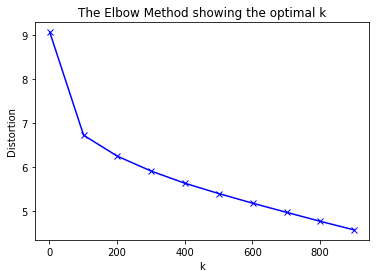

In [26]:
# k means determine k
distortions = []
K = range(1,1000, 100)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

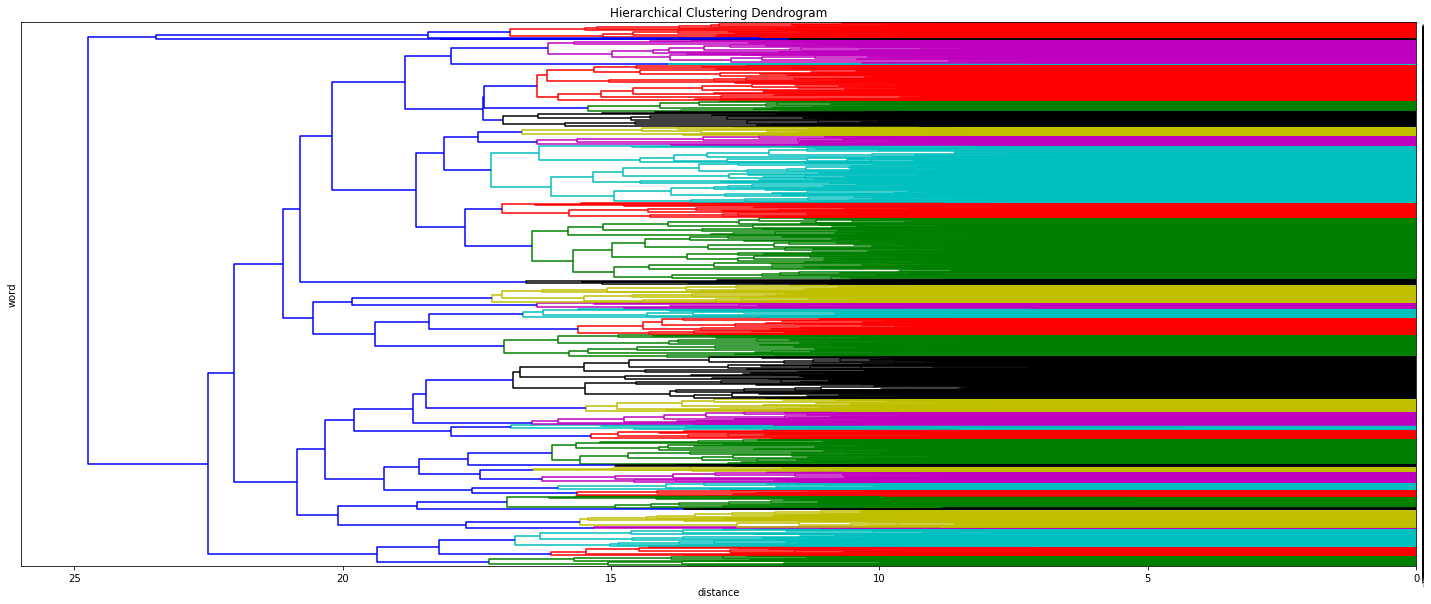

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 

# generate the linkage matrix
Z = linkage(X, method='complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=2.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(word2vec_model.wv.index2word[v])
)
plt.show()
plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
#as the reputation increases, find out the tags of the questions being asked by these users. Also find out the answers
# frequency with which they ask question and answer. and what is the general trend of the scores of these answers. 
# is there a trend that we see? So that we can use thes trend and then predict what type of questions to show to the user. 
# for him to answer. Or just read with the answer of these questions. 

In [43]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph



# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
X = word2vec_model[word2vec_model.wv.vocab]
knn_graph = kneighbors_graph(X, 40, include_self=False)
agg = AgglomerativeClustering(linkage="complete",
                                            connectivity=knn_graph,
                                            n_clusters=100)
t0 = time.time()
agg.fit(X)


/Users/ankurkothari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<3979x3979 sparse matrix of type '<class 'numpy.float64'>'
	with 159160 stored elements in Compressed Sparse Row format>,
            linkage='complete', memory=None, n_clusters=100,
            pooling_func=<function mean at 0x21b601d90>)

In [44]:
label = agg.labels_

In [45]:
word_cluster1 = {}
for i, word in enumerate(word2vec_model.wv.vocab.keys()):  
    word_cluster1[word] = label[i]
from collections import defaultdict

v1 = defaultdict(list)

for key, value in sorted(word_cluster1.items()):
    v1[value].append(key)

In [46]:
v1


defaultdict(list,
            {0: ['vba'],
             1: ['python'],
             2: ['php'],
             3: ['node.js'],
             4: ['java'],
             5: ['c++'],
             6: ['selenium'],
             7: ['c'],
             8: ['ios'],
             9: ['.htaccess'],
             10: ['hibernate'],
             11: ['grails'],
             12: ['wcf'],
             13: ['wpf'],
             14: ['r'],
             15: ['matplotlib'],
             16: ['symfony'],
             17: ['swing'],
             18: ['apache'],
             19: ['ruby'],
             20: ['scala'],
             21: ['spring'],
             22: ['hadoop'],
             23: ['bash'],
             24: ['pandas'],
             25: ['meteor'],
             26: ['firebase'],
             27: ['firebase-database'],
             28: ['shiny'],
             29: ['ruby-on-rails'],
             30: ['mod-rewrite'],
             31: ['qt'],
             32: ['excel'],
             33: ['xaml'],
           

In [592]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, agg.labels_))

Silhouette Coefficient: 0.069


In [593]:
#but kmeans clustering isnt showing any hierarchy. I think somehow I will to use association rule mining

In [47]:
knn_graph

<3979x3979 sparse matrix of type '<class 'numpy.float64'>'
	with 159160 stored elements in Compressed Sparse Row format>

In [48]:
kneighbors_graph(X, 2).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# vocab = list(model.wv.vocab.keys())

In [50]:
# df = spark.createDataFrame([i for i in enumerate(data[:100])], ["id", "items"])


In [51]:
# fpGrowth = FPGrowth(itemsCol="items", minSupport=0.05, minConfidence=0.1)
# model = fpGrowth.fit(df)

# # Display frequent itemsets.
# model.freqItemsets.show()

# # Display generated association rules.
# model.associationRules.show()

# # transform examines the input items against all the association rules and summarize the
# # consequents as prediction
# model.transform(df).show()

In [52]:
# import csv 
# import sys #used for passing in the argument
# file_name = "data.csv" #filename is argument 1
# with open(file_name, 'rU') as f:  #opens PW file
#     reader = csv.reader(f)
#     data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists


In [53]:
# len(data)

In [44]:
# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

word_vectors = [word2vec_model[w] for w in word2vec_model.wv.vocab]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)



Loading BokehJS ...

/Users/ankurkothari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3979 samples in 0.046s...
[t-SNE] Computed neighbors for 3979 samples in 7.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3979
[t-SNE] Computed conditional probabilities for sample 2000 / 3979
[t-SNE] Computed conditional probabilities for sample 3000 / 3979
[t-SNE] Computed conditional probabilities for sample 3979 / 3979
[t-SNE] Mean sigma: 3.247136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.576241
[t-SNE] Error after 1000 iterations: 1.667575


In [45]:
import pandas as pd


In [46]:
# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = word2vec_model.wv.vocab
# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)